In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [2]:
train = pd.read_csv("Train (1).csv")
test = pd.read_csv("Test.csv")

In [3]:
print(train.shape)
print(test.shape)

(135633, 26)
(45211, 25)


In [4]:
train.head()

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Age,...,Loan,Contact,Day,Month,Duration,contacts_during_campaign,pdays,previous_contacts,poutcome,target_variable
0,PQ100001,IN,AA,Region-1,2,Y,Y,M,175,58,...,no,unknown,5,may,261,1,-1,0,unknown,1
1,PQ100002,USA,AB,Region-2,1,N,N,F,150,44,...,no,unknown,5,may,151,1,-1,0,unknown,1
2,PQ100003,CA,AC,Region-3,1,N,Y,M,151,33,...,yes,unknown,5,may,76,1,-1,0,unknown,1
3,PQ100004,UK,AD,Region-4,1,Y,N,F,155,47,...,no,unknown,5,may,92,1,-1,0,unknown,1
4,PQ100005,PK,AE,Region-5,0,Y,Y,M,120,33,...,no,unknown,5,may,198,1,-1,0,unknown,1


In [5]:
train.isnull().sum()

Customer_ID                     0
Nationality                     0
State                           0
Region                          0
Num_dependants                  0
Social_Media_presence           0
International_Travel_History    0
Gender                          0
Months_at_Current_address       0
Age                             0
Job                             0
Marital Status                  0
Education                       0
Default                         0
Balance                         0
Housing                         0
Loan                            0
Contact                         0
Day                             0
Month                           0
Duration                        0
contacts_during_campaign        0
pdays                           0
previous_contacts               0
poutcome                        0
target_variable                 0
dtype: int64

In [6]:
print(train.Age.min())
print(train.Age.max())

18
99


In [7]:
bins= [18,26,66,100]
labels = ['Young','Adult','SeniorCitizen']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

In [8]:
print(train.Balance.min())
print(train.Balance.max())

-8019
102195


In [9]:
bins= [-8019,0,1,102196]
labels = ['Negative Balance','Zero Balance','Positive Balance']
train['BalanceGroup'] = pd.cut(train['Balance'], bins=bins, labels=labels, right=False)
test['BalanceGroup'] = pd.cut(train['Balance'], bins=bins, labels=labels, right=False)

In [10]:
train1=train.drop(['Age','Balance'], axis = 1)
test.drop(['Age','Balance'], axis = 1)

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Job,...,Contact,Day,Month,Duration,contacts_during_campaign,pdays,previous_contacts,poutcome,AgeGroup,BalanceGroup
0,PT400001,IN,AA,Region-1,2,Y,Y,M,183,management,...,unknown,6,may,281,2,-1,0,unknown,Adult,Positive Balance
1,PT400002,USA,AB,Region-2,1,N,N,F,150,technician,...,unknown,5,may,164,2,-1,0,unknown,Adult,Positive Balance
2,PT400003,CA,AC,Region-3,1,N,Y,M,131,entrepreneur,...,unknown,5,may,122,2,-1,0,unknown,Adult,Positive Balance
3,PT400004,UK,AD,Region-4,1,Y,N,F,158,blue-collar,...,unknown,5,may,97,1,-1,0,unknown,Adult,Positive Balance
4,PT400005,PK,AE,Region-5,0,Y,Y,M,104,unknown,...,unknown,7,may,286,2,-1,0,unknown,Adult,Positive Balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,PT445207,KE,AC,Region-2,5,N,Y,M,33,technician,...,cellular,18,nov,1088,3,-1,0,unknown,Adult,Positive Balance
45207,PT445208,IN,AD,Region-3,2,N,N,F,125,retired,...,cellular,18,nov,494,3,-1,0,unknown,SeniorCitizen,Positive Balance
45208,PT445209,USA,AE,Region-4,2,Y,Y,M,154,retired,...,cellular,19,nov,1244,5,184,3,success,SeniorCitizen,Positive Balance
45209,PT445210,CA,AF,Region-5,2,N,N,F,174,blue-collar,...,telephone,18,nov,514,4,-1,0,unknown,Adult,Positive Balance


In [11]:
for col in ['AgeGroup','BalanceGroup']:
    train1[col]= train1[col].astype('object')

In [12]:
train1.dtypes

Customer_ID                     object
Nationality                     object
State                           object
Region                          object
Num_dependants                   int64
Social_Media_presence           object
International_Travel_History    object
Gender                          object
Months_at_Current_address        int64
Job                             object
Marital Status                  object
Education                       object
Default                         object
Housing                         object
Loan                            object
Contact                         object
Day                              int64
Month                           object
Duration                         int64
contacts_during_campaign         int64
pdays                            int64
previous_contacts                int64
poutcome                        object
target_variable                  int64
AgeGroup                        object
BalanceGroup             

In [13]:
train1.loc[(train1.target_variable == 2),"target_variable"] = 'yes'
train1.loc[(train1.target_variable == 1) ,"target_variable"] = 'no'
train1.loc[(train1.target_variable == "yes"),"target_variable"] = 1
train1.loc[(train1.target_variable == "no") ,"target_variable"] = 0
train1.head()

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Job,...,Day,Month,Duration,contacts_during_campaign,pdays,previous_contacts,poutcome,target_variable,AgeGroup,BalanceGroup
0,PQ100001,IN,AA,Region-1,2,Y,Y,M,175,management,...,5,may,261,1,-1,0,unknown,0,Adult,Positive Balance
1,PQ100002,USA,AB,Region-2,1,N,N,F,150,technician,...,5,may,151,1,-1,0,unknown,0,Adult,Positive Balance
2,PQ100003,CA,AC,Region-3,1,N,Y,M,151,entrepreneur,...,5,may,76,1,-1,0,unknown,0,Adult,Positive Balance
3,PQ100004,UK,AD,Region-4,1,Y,N,F,155,blue-collar,...,5,may,92,1,-1,0,unknown,0,Adult,Positive Balance
4,PQ100005,PK,AE,Region-5,0,Y,Y,M,120,unknown,...,5,may,198,1,-1,0,unknown,0,Adult,Positive Balance


In [14]:
indexNames= train1[train1['target_variable']==0].index
train1.drop(indexNames, inplace= True)

# Exploratory Data Analysis and Data Pre Processing

In [15]:
# list of numerical variables
numerical_features = [feature for feature in train1.columns if train1[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  7


In [16]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train1[feature].unique())<25 and feature not in ['Customer_ID']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))


Discrete Variables Count: 1


In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['Customer_ID']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 6


In [18]:
categorical_features=[feature for feature in train1.columns if train1[feature].dtypes=='O'and feature not in ['Customer_ID']]

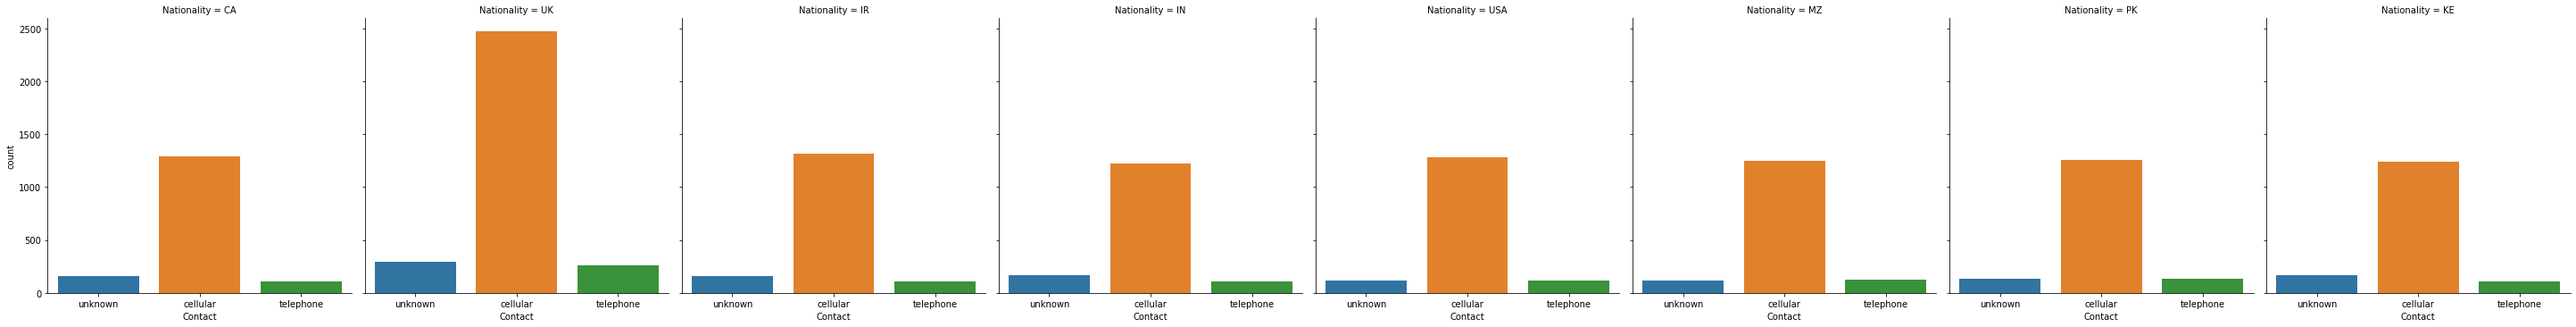

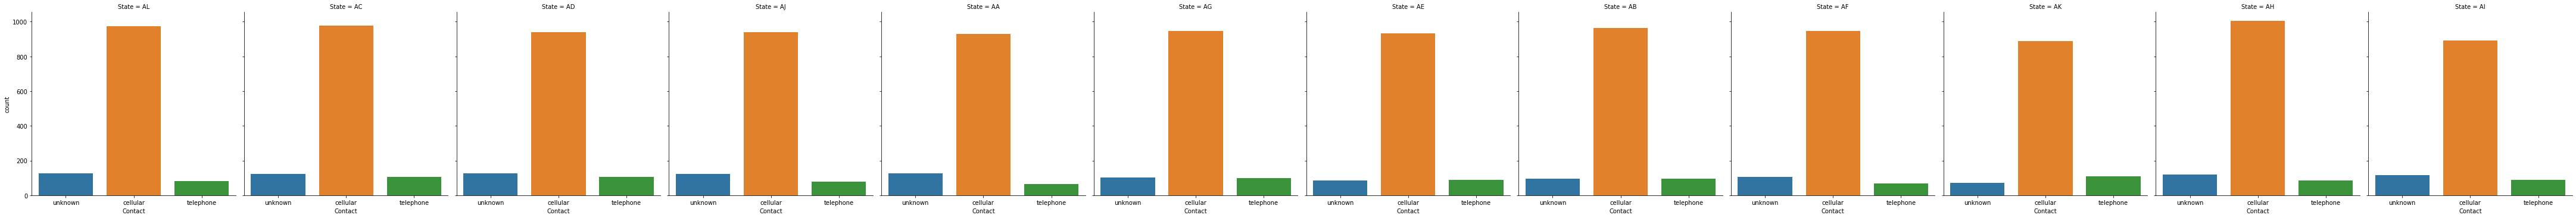

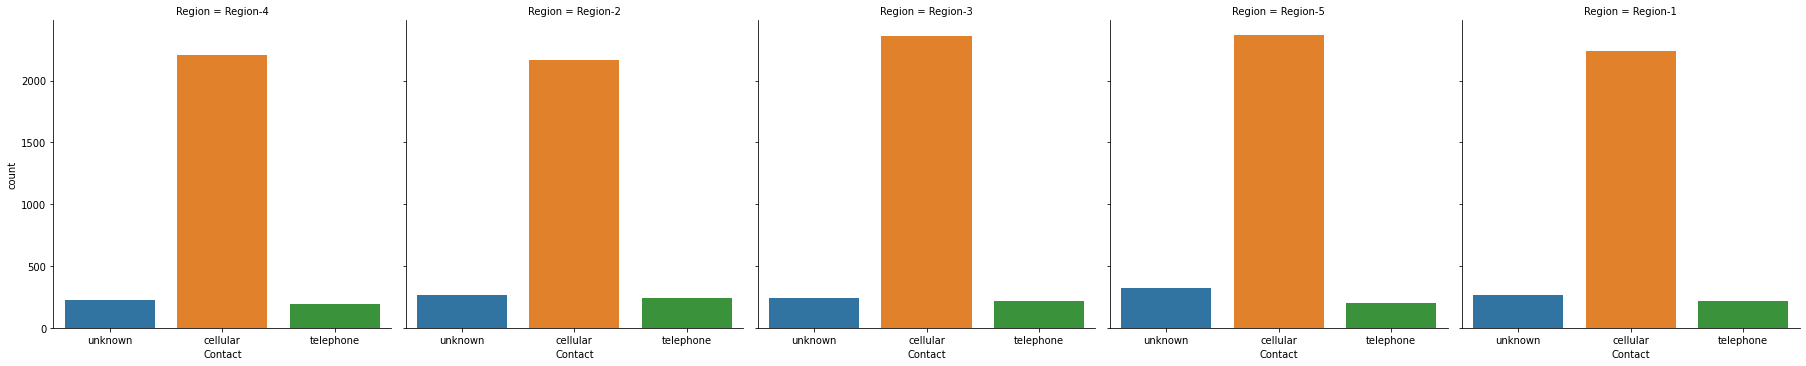

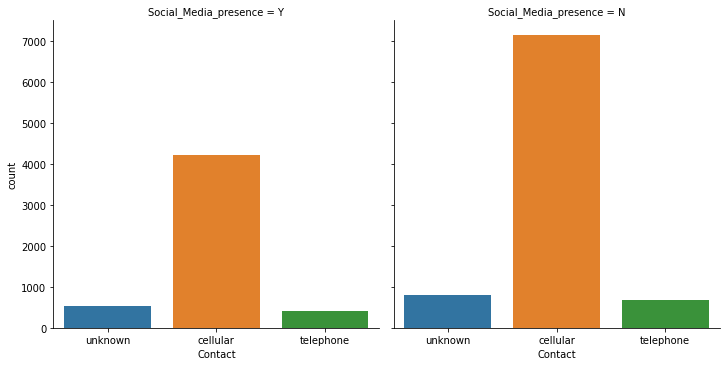

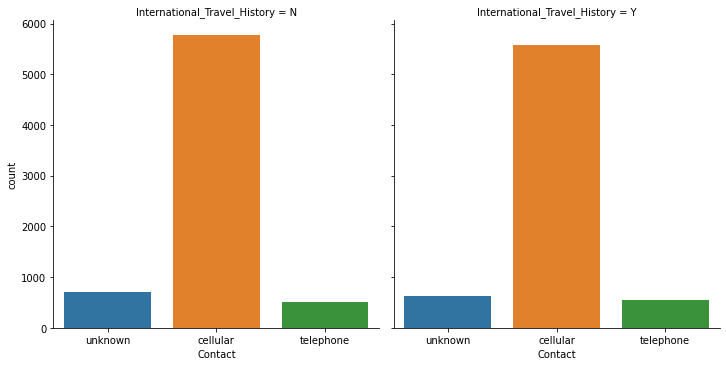

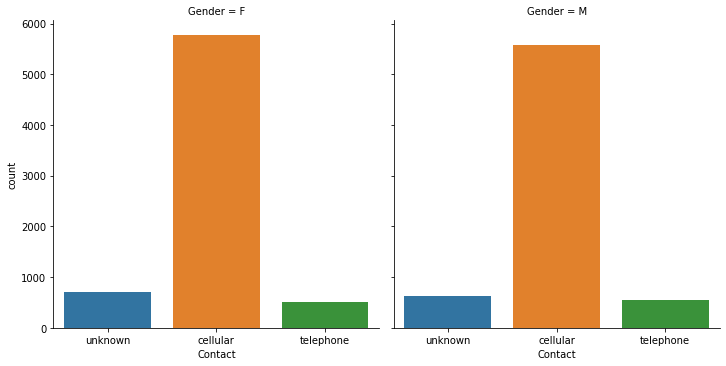

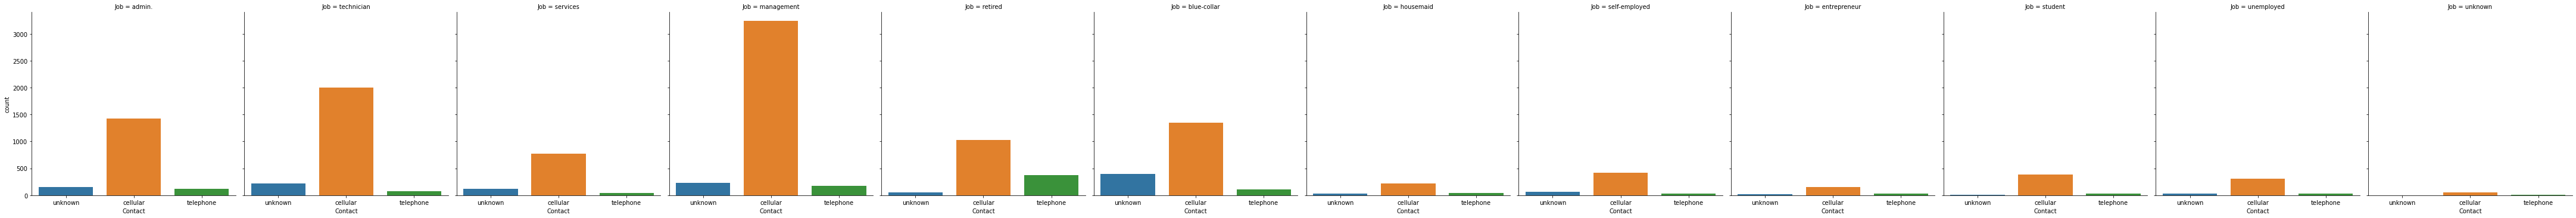

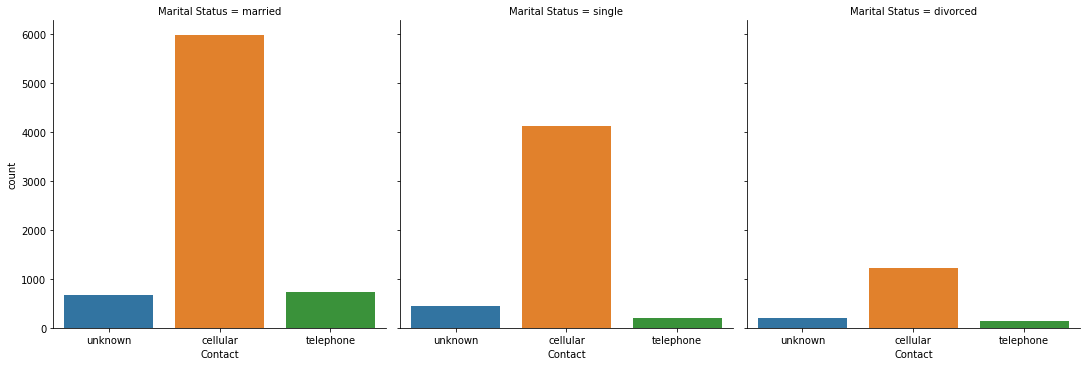

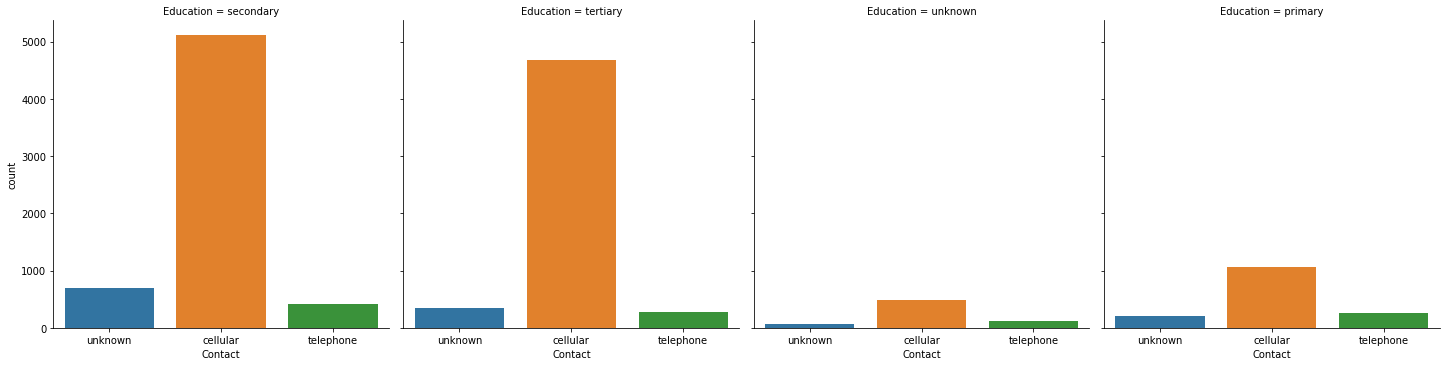

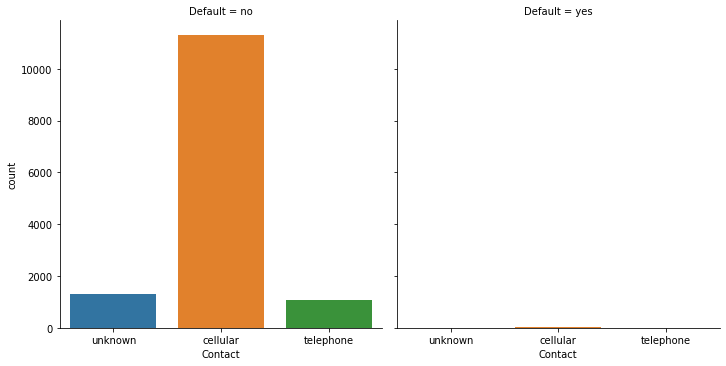

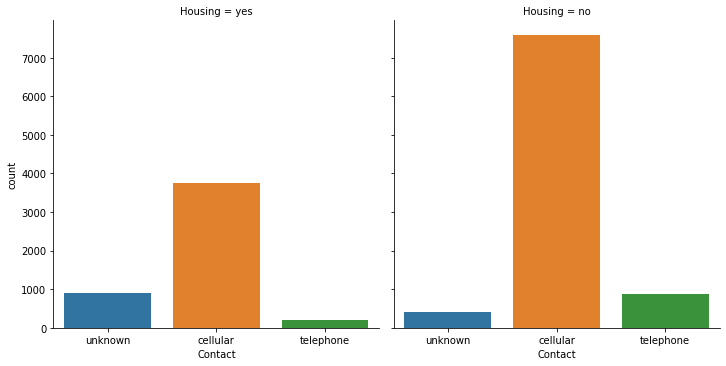

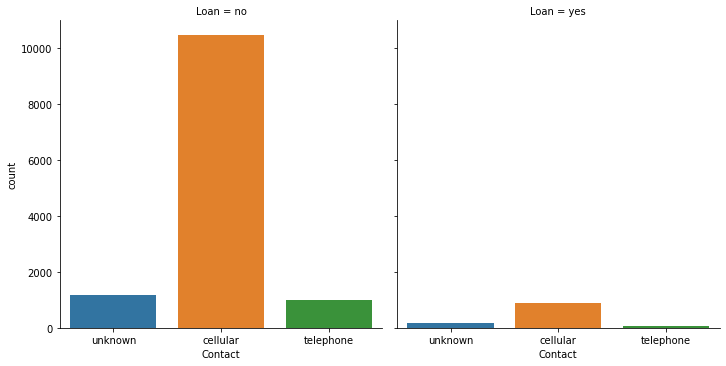

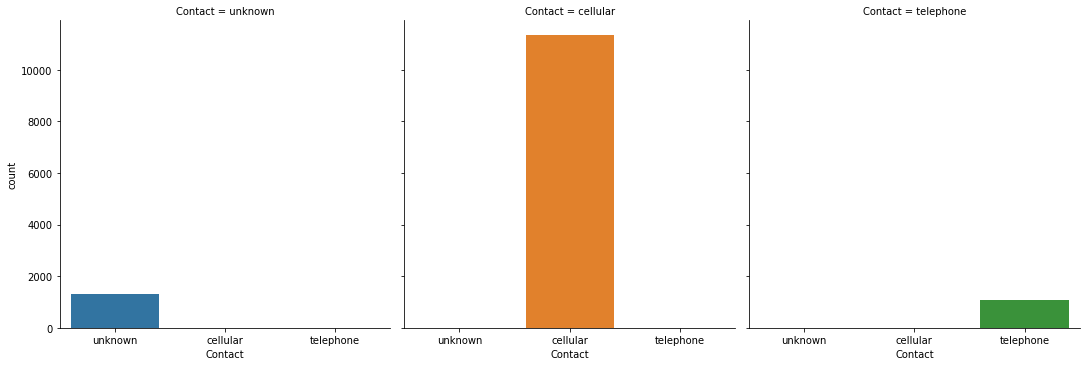

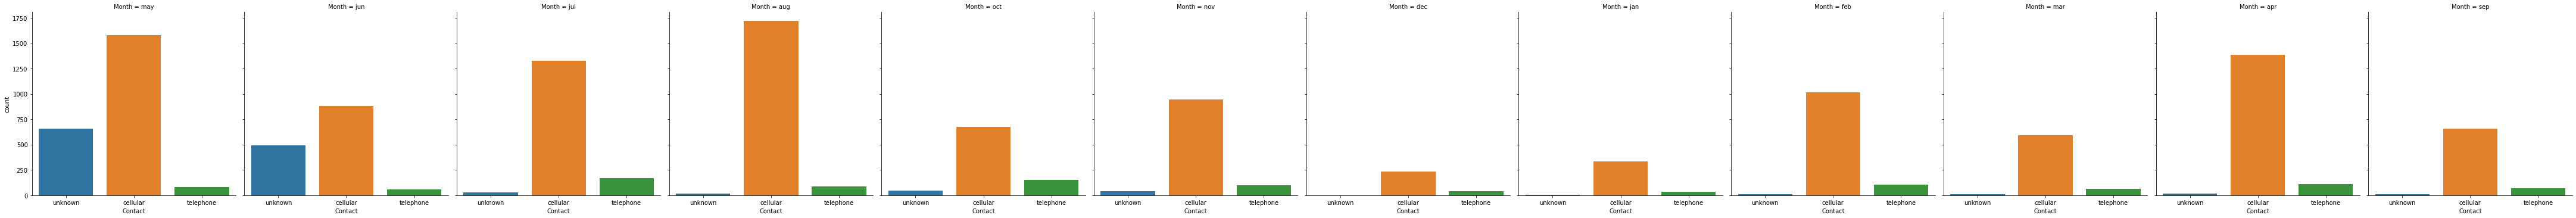

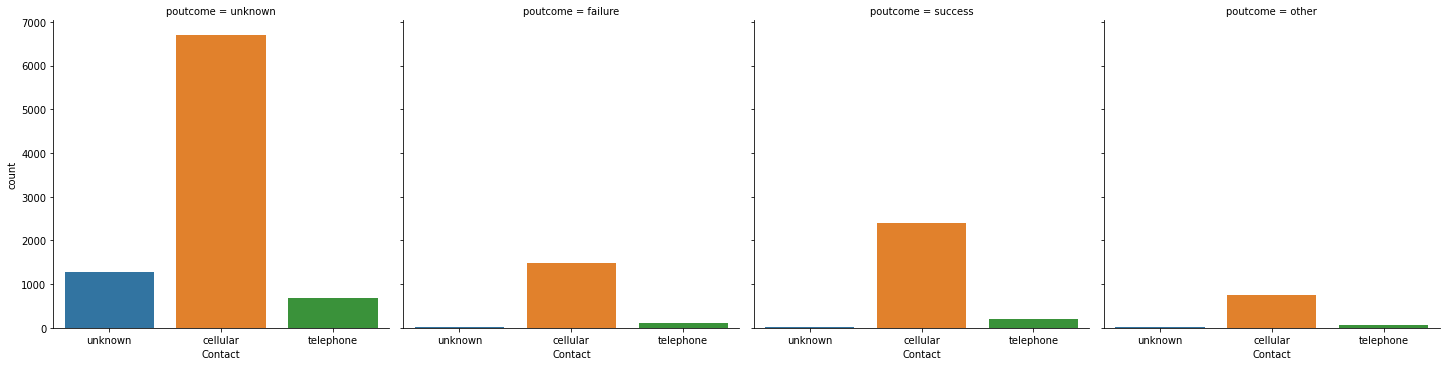

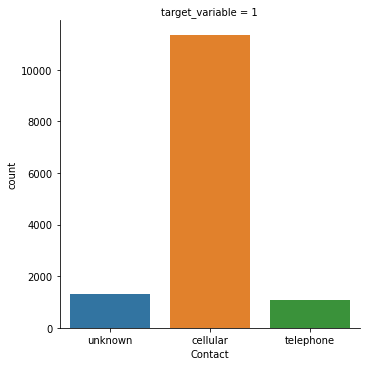

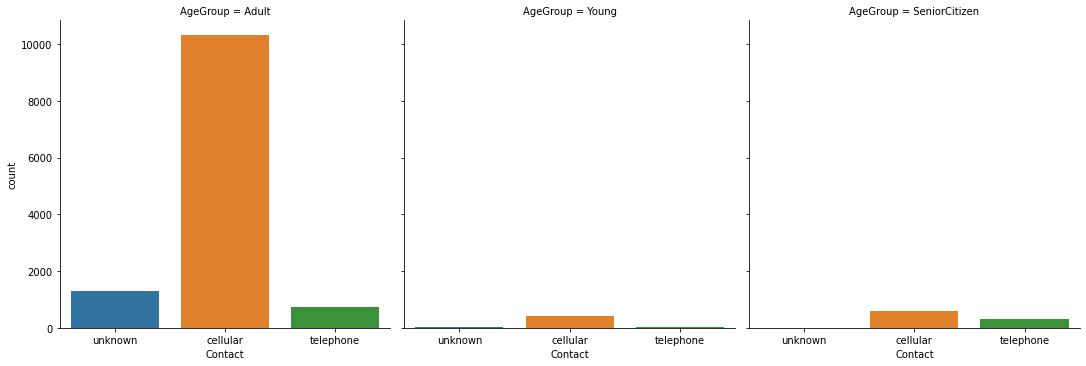

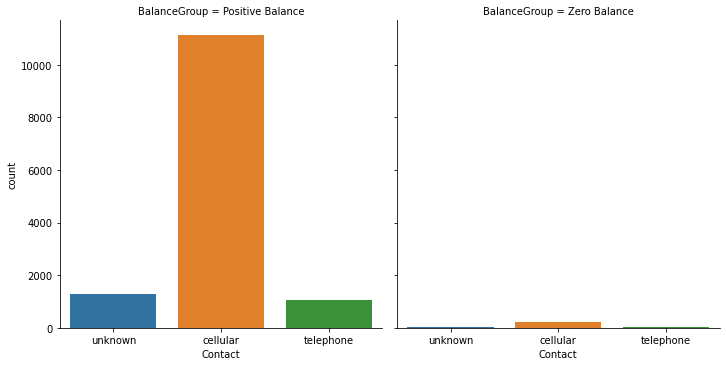

In [19]:
for categorical_feature in categorical_features:
    sns.catplot(x='Contact', col=categorical_feature, kind='count', data= train1)
plt.show()

In [20]:
#50% of values have pdays=-1
train1.groupby(['Contact','pdays']).size()
train1.drop('pdays', axis=1)

,Customer_ID,Nationality,State,Region,Num_dependants,Social_Media_presence,International_Travel_History,Gender,Months_at_Current_address,Job,...,Contact,Day,Month,Duration,contacts_during_campaign,previous_contacts,poutcome,target_variable,AgeGroup,BalanceGroup
83,PQ100084,CA,AL,Region-4,2,Y,N,F,91,admin.,...,unknown,5,may,1042,1,0,unknown,1,Adult,Positive Balance
86,PQ100087,UK,AC,Region-2,1,N,Y,M,137,admin.,...,unknown,5,may,1467,1,0,unknown,1,Adult,Positive Balance
87,PQ100088,IR,AD,Region-3,1,N,N,F,103,technician,...,unknown,5,may,1389,1,0,unknown,1,Adult,Positive Balance
129,PQ100130,UK,AJ,Region-5,0,N,N,F,78,services,...,unknown,5,may,579,1,0,unknown,1,Adult,Positive Balance
168,PQ100169,IR,AA,Region-4,5,Y,Y,M,188,admin.,...,unknown,5,may,673,2,0,unknown,1,Adult,Positive Balance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135626,PS345205,IR,AA,Region-5,4,Y,Y,M,78,retired,...,cellular,17,nov,410,2,8,failure,1,SeniorCitizen,Positive Balance
135627,PS345206,MZ,AB,Region-1,0,N,N,F,112,technician,...,cellular,17,nov,392,3,0,unknown,1,Adult,Positive Balance
135628,PS345207,KE,AC,Region-2,5,N,Y,M,51,technician,...,cellular,18,nov,985,3,0,unknown,1,Adult,Positive Balance
135629,PS345208,IN,AD,Region-3,2,N,N,F,122,retired,...,cellular,19,nov,468,3,0,unknown,1,SeniorCitizen,Positive Balance


In [21]:
len(train1.index)

13733

<AxesSubplot:xlabel='Contact', ylabel='count'>

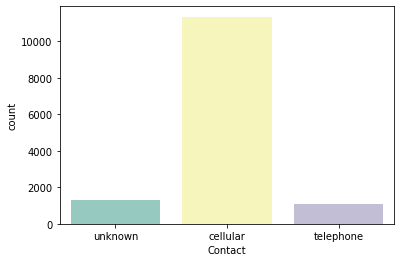

In [22]:
sns.countplot(x = 'Contact', data = train1, palette = 'Set3')

In [23]:
train1.loc[(train1.Default== "yes"),"Default"] = 1
train1.loc[(train1.Default== "no") ,"Default"] = 0
train1.loc[(train1.Social_Media_presence == "Y"),"Social_Media_presence"] = 1
train1.loc[(train1.Social_Media_presence == "N") ,"Social_Media_presence"] = 0
train1.loc[(train1.Housing== "yes"),"Housing"] = 1
train1.loc[(train1.Housing== "no") ,"Housing"] = 0
train1.loc[(train1.Loan == "yes"),"Loan"] = 1
train1.loc[(train1.Loan == "no") ,"Loan"] = 0
train1.Default = train1.Default.astype(int)
train1.Housing = train1.Housing.astype(int)
train1.Loan = train1.Loan.astype(int)
train1.Social_Media_presence = train1.Social_Media_presence.astype(int)
train1.target_variable= train1.target_variable.astype(int)

In [24]:
train1.loc[(train1.International_Travel_History == "Y"),"International_Travel_History"] = 1
train1.loc[(train1.International_Travel_History == "N") ,"International_Travel_History"] = 0
train1.International_Travel_History = train1.International_Travel_History.astype(int)

In [25]:
new_train = pd.get_dummies(train1,columns = ['Nationality','State','Gender','Region','Job','Marital Status','Education','Month','poutcome','AgeGroup','BalanceGroup'], drop_first = True)
new_train.head()

,Customer_ID,Num_dependants,Social_Media_presence,International_Travel_History,Months_at_Current_address,Default,Housing,Loan,Contact,Day,...,Month_may,Month_nov,Month_oct,Month_sep,poutcome_other,poutcome_success,poutcome_unknown,AgeGroup_SeniorCitizen,AgeGroup_Young,BalanceGroup_Zero Balance
83,PQ100084,2,1,0,91,0,1,0,unknown,5,...,1,0,0,0,0,0,1,0,0,0
86,PQ100087,1,0,1,137,0,0,0,unknown,5,...,1,0,0,0,0,0,1,0,0,0
87,PQ100088,1,0,0,103,0,1,0,unknown,5,...,1,0,0,0,0,0,1,0,0,0
129,PQ100130,0,0,0,78,0,1,0,unknown,5,...,1,0,0,0,0,0,1,0,0,0
168,PQ100169,5,1,1,188,0,0,0,unknown,5,...,1,0,0,0,0,0,1,0,0,0


In [26]:
train2=new_train.drop(['Customer_ID','target_variable','pdays'],axis=1)

In [27]:
train2.dtypes

Num_dependants                  int64
Social_Media_presence           int32
International_Travel_History    int32
Months_at_Current_address       int64
Default                         int32
                                ...  
poutcome_success                uint8
poutcome_unknown                uint8
AgeGroup_SeniorCitizen          uint8
AgeGroup_Young                  uint8
BalanceGroup_Zero Balance       uint8
Length: 68, dtype: object

# Model Building

In [28]:
X = train2.drop('Contact', axis = 1)
y = train2['Contact']


Feature Importance

In [29]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [30]:
sel.get_support()

array([ True, False, False,  True, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True, False, False])

In [31]:
selected_feat = X.columns[(sel.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 67
selected features: 11


In [32]:
selected_feat

Index(['Num_dependants', 'Months_at_Current_address', 'Housing', 'Day',
       'Duration', 'contacts_during_campaign', 'previous_contacts',
       'Month_jun', 'Month_may', 'poutcome_unknown', 'AgeGroup_SeniorCitizen'],
      dtype='object')

In [33]:
X=X[selected_feat]

Model 1

In [34]:
from imblearn.ensemble import BalancedRandomForestClassifier
rf = BalancedRandomForestClassifier()
rf.fit(X, y)
print("The Training Accuracy is: ", rf.score(X, y))
y_pred2 = rf.predict(X)
print(confusion_matrix(y, y_pred2))
print(classification_report(y, y_pred2))

The Training Accuracy is:  0.8280055341149057
[[8981 1615  747]
 [   0 1072    0]
 [   0    0 1318]]
              precision    recall  f1-score   support

    cellular       1.00      0.79      0.88     11343
   telephone       0.40      1.00      0.57      1072
     unknown       0.64      1.00      0.78      1318

    accuracy                           0.83     13733
   macro avg       0.68      0.93      0.74     13733
weighted avg       0.92      0.83      0.85     13733



Model 2(Final Model)

In [35]:
from imblearn.ensemble import BalancedBaggingClassifier
# define model
model = BalancedBaggingClassifier()
model.fit(X, y)
print("The Training Accuracy is: ", model.score(X, y))
y_pred3 = model.predict(X)
print(confusion_matrix(y, y_pred3))
print(classification_report(y, y_pred3))

The Training Accuracy is:  0.8781038374717833
[[9704 1113  526]
 [  18 1054    0]
 [  14    3 1301]]
              precision    recall  f1-score   support

    cellular       1.00      0.86      0.92     11343
   telephone       0.49      0.98      0.65      1072
     unknown       0.71      0.99      0.83      1318

    accuracy                           0.88     13733
   macro avg       0.73      0.94      0.80     13733
weighted avg       0.93      0.88      0.89     13733



Cross Validation Score

In [36]:
score=cross_val_score(model,X, y,cv=5)

In [37]:
score.mean()

0.7951654072203777

Confusion Matrix and ROC Curve

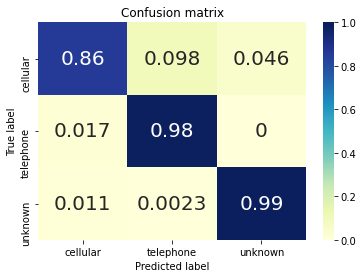

In [49]:
# Confusion Matrix function
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y_pred3 = LabelEncoder().fit_transform(y_pred3)
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':20})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Visualizing cm

cm = confusion_matrix(y, y_pred3)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')

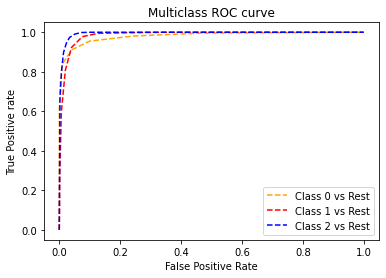

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
#Compute ROC curve and ROC area for each class
y = LabelEncoder().fit_transform(y)
pred = model.predict(X)
pred_prob = model.predict_proba(X)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=500);   

# Model run on Test set

In [39]:
test.loc[(test.Default == "yes"),"Default"] = 1
test.loc[(test.Default == "no") ,"Default"] = 0
test.loc[(test.Social_Media_presence == "Y"),"Social_Media_presence"] = 1
test.loc[(test.Social_Media_presence == "N") ,"Social_Media_presence"] = 0
test.loc[(test.International_Travel_History == "Y"),"International_Travel_History"] = 1
test.loc[(test.International_Travel_History == "N") ,"International_Travel_History"] = 0
test.loc[(test.Gender == "M"),"Gender"] = 1
test.loc[(test.Gender == "F") ,"Gender"] = 0
test.loc[(test.Housing == "yes"),"Housing"] = 1
test.loc[(test.Housing == "no") ,"Housing"] = 0
test.loc[(test.Loan == "yes"),"Loan"] = 1
test.loc[(test.Loan == "no") ,"Loan"] = 0

In [40]:

test1= pd.get_dummies(test,columns = ['Nationality','State','Gender','Region','Job','Marital Status','Education','Month','poutcome','AgeGroup','BalanceGroup'])
test1.head()

,Customer_ID,Num_dependants,Social_Media_presence,International_Travel_History,Months_at_Current_address,Age,Default,Balance,Housing,Loan,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,AgeGroup_Young,AgeGroup_Adult,AgeGroup_SeniorCitizen,BalanceGroup_Negative Balance,BalanceGroup_Zero Balance,BalanceGroup_Positive Balance
0,PT400001,2,1,1,183,56,0,2187,1,0,...,0,0,0,1,0,1,0,0,0,1
1,PT400002,1,0,0,150,47,0,93,1,0,...,0,0,0,1,0,1,0,0,0,1
2,PT400003,1,0,1,131,32,0,13,1,1,...,0,0,0,1,0,1,0,0,0,1
3,PT400004,1,1,0,158,48,0,1564,1,0,...,0,0,0,1,0,1,0,0,0,1
4,PT400005,0,1,1,104,34,0,-2,0,0,...,0,0,0,1,0,1,0,0,0,1


In [41]:
x=test1[selected_feat]

In [42]:
y_prediction=model.predict(x)

In [43]:
Contact_pred= pd.DataFrame(y_prediction)
v=Contact_pred.rename(columns={0:'Contact_pred'})

In [44]:
print(v)

      Contact_pred
0         cellular
1         cellular
2         cellular
3         cellular
4         cellular
...            ...
45206     cellular
45207    telephone
45208     cellular
45209     cellular
45210     cellular

[45211 rows x 1 columns]


In [45]:
df=pd.DataFrame(test)
result=pd.merge(df,v,how = 'left',left_index = True, right_index = True)
rslt=result.drop(['Age','Balance'],axis=1)

In [50]:
rslt.to_csv('Important(Most)2.csv',index=False)